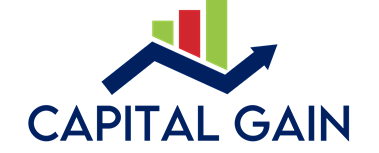
### ADMN5006: Financial Analytics
#### Final Project
Asharani Sukumaran Nair, Donovan Bangs, Maria Isabel Dio Grau, Xiuhao Shuai

***

### <b><span style="color:red"> **Add links</span></b>

<a href='#historical'>Historical Stock Performance</a><br>
<a href='#corr'>Covariance and Correlation</a><br>
<a href='#montecarlo'>Monte Carlo Analysis</a><br>
<a href='#portfolio'>Portfolio Optimization</a><br>
<a href='#scenario'>Scenario Analysis</a><br>

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import yfinance as yfin
yfin.pdr_override()
import math
from scipy.stats import norm
import seaborn

In [2]:
# Setup

stocks = ['NVDA', 'ABBV', 'TTE', 'LUV']
N = 255 # Number of trading days
rf = 0.00833 #13-week US T-Bill rate as of April 26, 2022 (Yahoo Finance: ^IRX)


In [20]:
startdate = datetime(2013,1,1)
enddate = datetime(2019,12,31)

corrstartdate = datetime(2018,1,1)

A shorter timeframe is used for the correlation analysis. A longer timeframe will show strong positive correlations across all stocks since the broad market, including the stocks in this portfolio, increased significantly.

### <b><span style="color:red"> **ABBV went public in 2013. Look for comparable stock or change start date from 2010 to 2013?</span></b>

In [21]:
table = pdr.get_data_yahoo(stocks, data_source = 'yahoo', start = startdate, end = enddate)['Adj Close']

[*********************100%***********************]  4 of 4 completed


In [22]:
table.head()

,ABBV,LUV,NVDA,TTE
Date,,,,
2013-01-02,23.783295,9.779128,2.939528,30.516867
2013-01-03,23.586918,10.012629,2.941837,30.290482
2013-01-04,23.288942,10.162070,3.038898,30.365953
2013-01-07,23.336349,10.190088,2.951082,30.006046
2013-01-08,22.828442,10.302170,2.886375,29.942190


In [23]:
df = table.pct_change().dropna()

In [24]:
df.head()

,ABBV,LUV,NVDA,TTE
Date,,,,
2013-01-03,-0.008257,0.023877,0.000786,-0.007418
2013-01-04,-0.012633,0.014925,0.032993,0.002492
2013-01-07,0.002036,0.002757,-0.028897,-0.011852
2013-01-08,-0.021765,0.010999,-0.021926,-0.002128
2013-01-09,0.005637,-0.002720,-0.022418,-0.000582


<AxesSubplot:ylabel='Sharpe Ratio'>

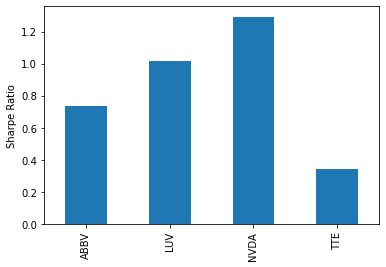

In [32]:
def sharpe_ratio(return_series,N,rf):
    mean=return_series.mean()*N-rf
    sigma=return_series.std()*np.sqrt(N)
    return mean/sigma

sharpes = df.apply(sharpe_ratio,args=(N,rf),axis=0)
plt.ylabel('Sharpe Ratio')
sharpes.plot.bar()

<AxesSubplot:ylabel='Sortino Ratio'>

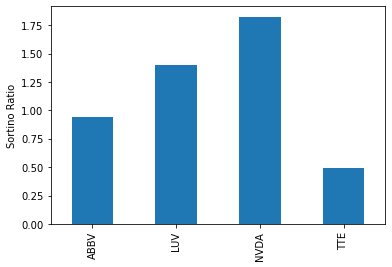

In [31]:
def sortino_ratio(series,N,rf):
    mean=series.mean()*N-rf
    std_neg=series[series<0].std()*np.sqrt(N)
    return mean/std_neg

sortinos = df.apply(sortino_ratio,args=(N,rf,),axis=0)
plt.ylabel('Sortino Ratio')
sortinos.plot.bar()

<AxesSubplot:ylabel='Max Drawdown'>

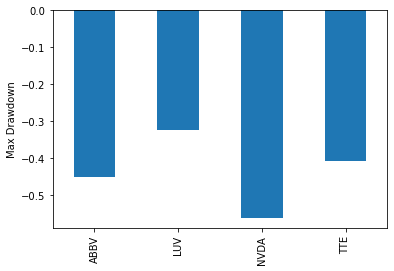

In [34]:
def max_drawdown(return_series):
    comp_ret=(return_series+1).cumprod()
    peak = comp_ret.expanding(min_periods=1).max()
    dd = (comp_ret/peak)-1
    return dd.min()

max_drawdowns = df.apply(max_drawdown,axis=0)
plt.ylabel('Max Drawdown')
max_drawdowns.plot.bar()

<AxesSubplot:ylabel='Calmar Ratio'>

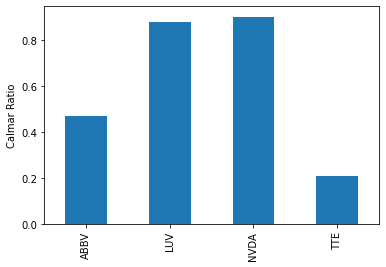

In [36]:
calmars =df.mean()*N/abs(max_drawdowns)

plt.ylabel('Calmar Ratio')
calmars.plot.bar()

In [38]:
pd.DataFrame([sharpes, sortinos, max_drawdowns, calmars], index=['Sharpe Ratio', 'Sortino Ratio', 'Max Drawdown', 'Calmar Ratio'])

,ABBV,LUV,NVDA,TTE
Sharpe Ratio,0.736371,1.017231,1.292505,0.345550
Sortino Ratio,0.945319,1.400368,1.822801,0.492753
Max Drawdown,-0.450898,-0.322948,-0.560384,-0.407697
Calmar Ratio,0.469027,0.880036,0.901361,0.206709


AttributeError: 'Line2D' object has no property 'kind'

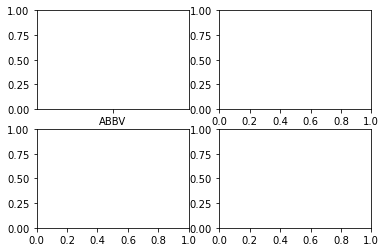

In [40]:
# subplot test
fig, axs = plt.subplots(nrows=2, ncols=2)

axs[0, 0].plot(sharpes, kind='bar')
axs[0, 0].set_title('Axis [0, 0]')
axs[0, 1].plot(x, y, 'tab:orange')
axs[0, 1].set_title('Axis [0, 1]')
axs[1, 0].plot(x, -y, 'tab:green')
axs[1, 0].set_title('Axis [1, 0]')
axs[1, 1].plot(x, -y, 'tab:red')
axs[1, 1].set_title('Axis [1, 1]')

plt.show()

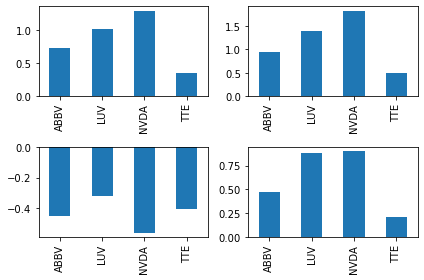

In [44]:
fig = plt.figure()

plt.subplot(2, 2, 1)
sharpes.plot.bar()

plt.subplot(2, 2, 2)
sortinos.plot.bar()

plt.subplot(2, 2, 3)
max_drawdowns.plot.bar()

plt.subplot(2, 2, 4)
calmars.plot.bar()

fig.tight_layout()
plt.show()

In [ ]:
# Code from week 7; modify for scenario analysis

df = stocks.pct_change().dropna()
df['port']=df.mean(axis=1)
(df+1).cumprod().plot()

(df+1).cumprod()[-1:]

•	Understand & comment on the past performances of each stock in your portfolio.
•	Understand & comment on the covariance and correlation between each stock in your portfolio.
•	Perform price prediction using Monte Carlo analysis for each stock and comment on their outlook.
